In [1]:
!pip install opencv-python-headless
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


In [2]:
im_path = "my-bill.jpg"
#read image from path
img = cv2.imread(im_path)
print(img.shape)

(450, 246, 3)


Image Resize

In [4]:
img = cv2.resize(img, (1200, 1500))
print(img.shape)

(1500, 1200, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

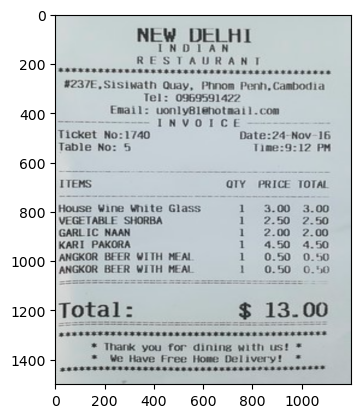

In [5]:
plt.imshow(img)
plt.show

Remove Noise


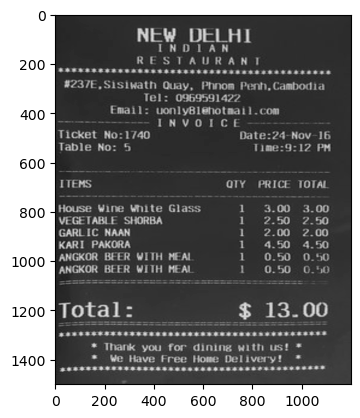

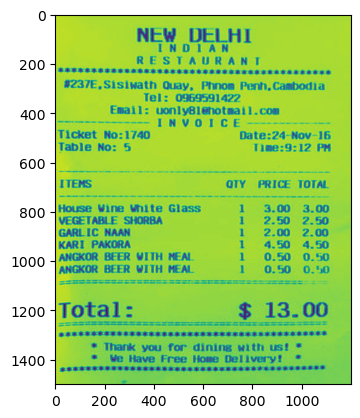

In [7]:
orig = img.copy()
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="binary")
plt.show()

blurred = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(blurred)
plt.show()

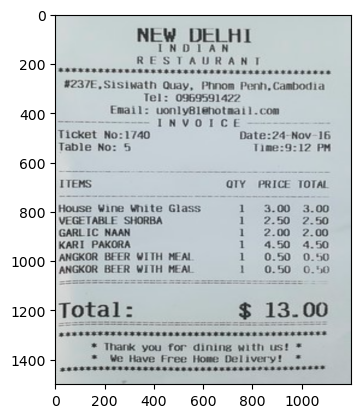

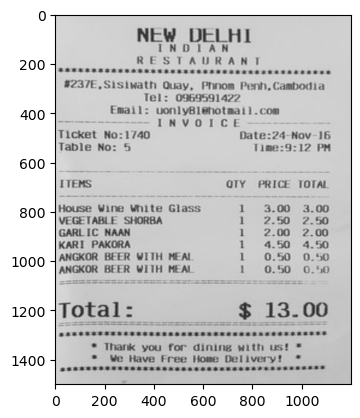

In [8]:
regen = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

plt.imshow(regen)
plt.show()

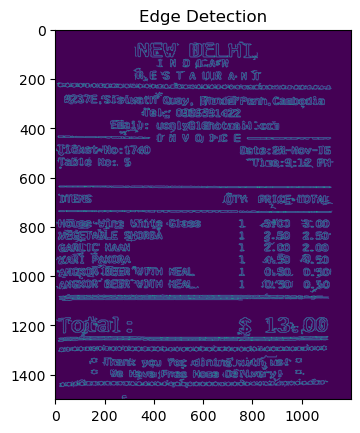

In [9]:
edge = cv2.Canny(blurred, 0,50)
orig_edge = edge.copy()
plt.imshow(orig_edge)
plt.title("Edge Detection")
plt.show()

In [10]:
contours, _ = cv2.findContours(edge , cv2.RETR_LIST , cv2.CHAIN_APPROX_NONE)
contours
print(len(contours))

contours = sorted(contours, reverse= True, key = cv2.contourArea )

3938


In [11]:
import cv2

# Assume 'contours' is a list of contours obtained from some image processing
for c in contours:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01 * p, True)

    if len(approx) == 4:
        target = approx
        break

print(target.shape)


(4, 1, 2)


In [12]:
def reorder(h):
    h = h.reshape((4,2))
    print(h)
    hnew = np.zeros((4,2), dtype = np.float32 )
    add = h.sum(axis = 1)
    hnew[3] = h[np.argmax(add)]
    hnew[1] = h[np.argmax(add)]
    diff = np.diff(h, axis = 1)
    hnew[0] = h[np.argmax(diff)]
    hnew[2] = h[np.argmax(diff)]
    return hnew

In [13]:
reorder = reorder(target)
print(reorder)

[[171 739]
 [169 736]
 [ 43 737]
 [ 46 740]]
[[ 43. 737.]
 [171. 739.]
 [ 43. 737.]
 [171. 739.]]


In [14]:
input_representation = reorder

output_map = np.float32([[0,0],[800,0], [800,800],[0,800]])

In [15]:
M = cv2.getPerspectiveTransform(input_representation, output_map)
ans = cv2.warpPerspective(orig, M, (800,800))

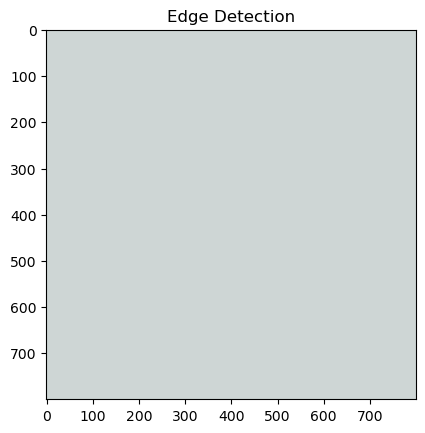

In [16]:
plt.imshow(ans)
plt.title("Edge Detection")
plt.show()

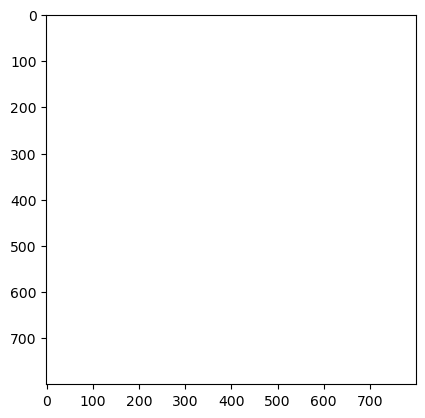

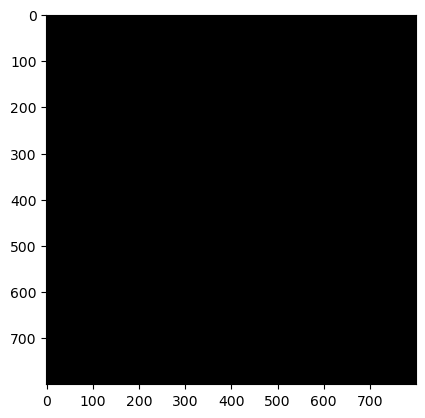

In [34]:
res = cv2.cvtColor(ans , cv2.COLOR_BGR2GRAY )
b_res = cv2.GaussianBlur(res, (3,3), 0)
plt.imshow(res ,cmap = "binary")
plt.show()

plt.imshow(b_res, cmap= "gray")
plt.show()